In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('data/data_by_month/jan_2023.csv')
ids = pd.read_csv('data/data_by_month/airline_id.csv')

In [43]:
# data cleaning
df.fillna(0, inplace=True)

# rename airlines
airline_names = pd.DataFrame(df['OP_CARRIER_AIRLINE_ID'].unique(), columns=['Code']).merge(ids, on='Code', how='left')
airline_names['Description'] = airline_names['Description'].apply(lambda x: x.split(':')[0])
airline_names['Description'] = airline_names['Description'].apply(lambda x: x.split('LLC')[0])

airline_names


,Code,Description
0,19393,Southwest Airlines Co.
1,19687,Horizon Air
2,19690,Hawaiian Airlines Inc.
3,19790,Delta Air Lines Inc.
4,19805,American Airlines Inc.
5,19930,Alaska Airlines Inc.
6,19977,United Air Lines Inc.
7,20046,Air Wisconsin Airlines Corp
8,20304,SkyWest Airlines Inc.
9,20363,Endeavor Air Inc.


In [20]:
delay_fields = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
grouped_df = df.groupby('OP_CARRIER_AIRLINE_ID')[delay_fields].sum()
grouped_df['TOTAL_FLIGHTS'] = df.groupby('OP_CARRIER_AIRLINE_ID').size()
grouped_with_airline = pd.merge(grouped_df, ids, left_on='OP_CARRIER_AIRLINE_ID', right_on='Code')
average_delays = grouped_with_airline
for delay in delay_fields:
    average_delays[delay] = grouped_with_airline[delay] / grouped_with_airline['TOTAL_FLIGHTS']
average_delays

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_FLIGHTS,Code,Description
0,3.363195,0.224220,1.831015,0.015521,5.868354,112430,19393,Southwest Airlines Co.: WN
1,2.386913,0.775728,2.174815,0.006468,3.798745,5257,19687,Horizon Air: QX
2,6.627445,0.384948,0.344931,0.009258,3.529341,6697,19690,Hawaiian Airlines Inc.: HA
3,6.670697,1.133238,2.712374,0.009152,4.160867,75174,19790,Delta Air Lines Inc.: DL
4,5.941173,0.752010,3.892345,0.047561,6.833491,74999,19805,American Airlines Inc.: AA
5,2.943084,0.382506,3.261098,0.037826,4.034140,19801,19930,Alaska Airlines Inc.: AS
6,4.964276,0.484706,3.937995,0.000971,6.618635,56657,19977,United Air Lines Inc.: UA
7,5.900620,0.711258,3.468306,0.000000,10.649270,5001,20046,Air Wisconsin Airlines Corp: ZW
8,8.600787,3.485471,0.896999,0.085881,4.198316,50349,20304,SkyWest Airlines Inc.: OO
9,4.714345,1.751802,3.835815,0.004963,5.886683,16926,20363,Endeavor Air Inc.: 9E


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'CommuteAir LLC dba CommuteAir: C5'),
  Text(1, 0, 'Frontier Airlines Inc.: F9'),
  Text(2, 0, 'SkyWest Airlines Inc.: OO'),
  Text(3, 0, 'JetBlue Airways: B6'),
  Text(4, 0, 'Delta Air Lines Inc.: DL'),
  Text(5, 0, 'Hawaiian Airlines Inc.: HA'),
  Text(6, 0, 'Allegiant Air: G4'),
  Text(7, 0, 'Spirit Air Lines: NK'),
  Text(8, 0, 'Mesa Airlines Inc.: YV'),
  Text(9, 0, 'American Airlines Inc.: AA'),
  Text(10, 0, 'Air Wisconsin Airlines Corp: ZW'),
  Text(11, 0, 'GoJet Airlines LLC d/b/a United Express: G7'),
  Text(12, 0, 'United Air Lines Inc.: UA'),
  Text(13, 0, 'Endeavor Air Inc.: 9E'),
  Text(14, 0, 'Southwest Airlines Co.: WN'),
  Text(15, 0, 'Alaska Airlines Inc.: AS'),
  Text(16, 0, 'Envoy Air: MQ'),
  Text(17, 0, 'PSA Airlines Inc.: OH'),
  Text(18, 0, 'Piedmont Airlines: PT'),
  Text(19, 0, 'Horizon Air: QX'),
  Text(20, 0, 'Republic Airline: YX')])

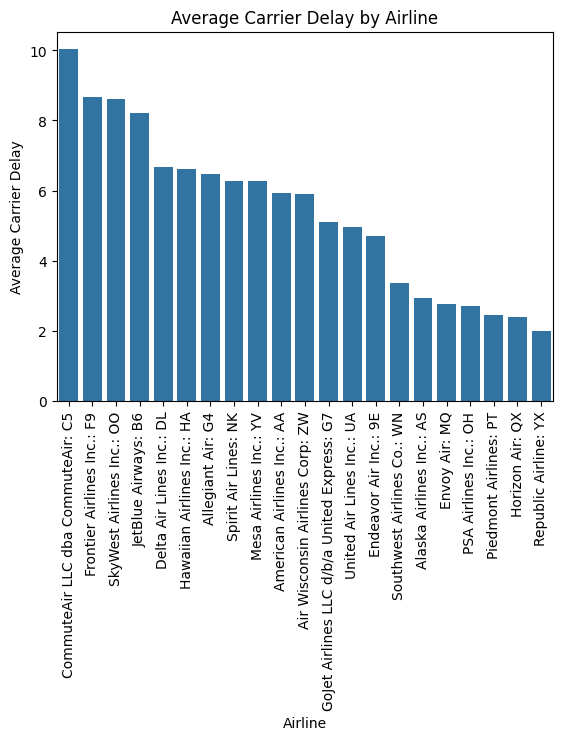

In [25]:
# Sort the DataFrame by 'CARRIER_DELAY' in ascending order
average_delays_sorted = average_delays.sort_values('CARRIER_DELAY', ascending=False)

# Plot the sorted DataFrame
plt.figure()
plt.title('Average Carrier Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Carrier Delay')
sns.barplot(x='Description', y='CARRIER_DELAY', data=average_delays_sorted)
plt.xticks(rotation=90)

